<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-04-06 09:44:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-04-06 09:44:31 (11.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df = df.iloc[:,2:]
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 8)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2019.11.28         |           py36_1         157 KB  anaconda
    seaborn-0.10.0             |             py_0         161 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2019.11.28-py36_0  --> 2019.11.28-py36_1 anaconda
    openssl:         1.1.1e-h7b6447c_0  --> 1.1.1-h7b6447c_0  anaconda
    seaborn:         0.9.0-pyh91

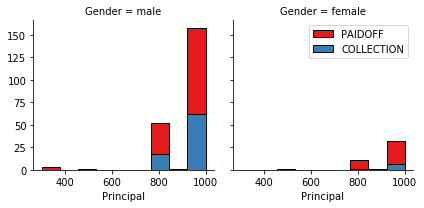

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

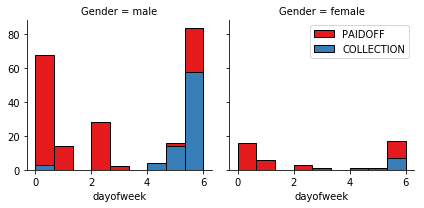

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [13]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [14]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [15]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [16]:
X_train = Feature
X_train[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [17]:
y_train = df['loan_status'].map({"PAIDOFF":1, "COLLECTION":0})
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [18]:
# Get column names
col_lst = Feature.columns.values.tolist()
# Apply StandardScaler
standardize= preprocessing.StandardScaler().fit(X_train)
X_train_standardize = standardize.transform(X_train)
X_train_df = pd.DataFrame(X_train_standardize, columns=col_lst).add_prefix("StandardScaler_")

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [19]:
X_train_df.head()

,StandardScaler_Principal,StandardScaler_terms,StandardScaler_age,StandardScaler_Gender,StandardScaler_weekend,StandardScaler_Bechalor,StandardScaler_High School or Below,StandardScaler_college
0,0.515785,0.920718,2.331526,-0.420560,-1.205778,-0.381701,1.136394,-0.869681
1,0.515785,0.920718,0.341701,2.377782,-1.205778,2.619854,-0.879977,-0.869681
2,0.515785,-0.959111,-0.653211,-0.420560,-1.205778,-0.381701,-0.879977,1.149847
3,0.515785,0.920718,-0.487392,2.377782,0.829340,-0.381701,-0.879977,1.149847
4,0.515785,0.920718,-0.321573,-0.420560,0.829340,-0.381701,-0.879977,1.149847


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, jaccard_similarity_score, log_loss

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [21]:
# Train test split
x_train, x_test, y_train1, y_test = train_test_split(X_train_df, y_train, test_size=.3, random_state=42)

In [22]:
list_k = []
list_acc = []
for K_value in range(1, int(y_train.shape[0] ** 0.5)):
    list_k.append(K_value)
    knn = KNeighborsClassifier(n_neighbors=K_value)
    knn.fit(x_train, y_train1)
    yhat = knn.predict(x_test)
    acc = accuracy_score(y_test, yhat) * 100
    list_acc.append(acc)
    print("Accuracy is", acc, "% for K-Value:", K_value)
vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]
print("\nThe optimal number of neighbor is %d with %0.1f%%" %(k, list_acc[vi_tri]))

Accuracy is 71.15384615384616 % for K-Value: 1
Accuracy is 60.57692307692307 % for K-Value: 2
Accuracy is 67.3076923076923 % for K-Value: 3
Accuracy is 69.23076923076923 % for K-Value: 4
Accuracy is 71.15384615384616 % for K-Value: 5
Accuracy is 71.15384615384616 % for K-Value: 6
Accuracy is 68.26923076923077 % for K-Value: 7
Accuracy is 68.26923076923077 % for K-Value: 8
Accuracy is 69.23076923076923 % for K-Value: 9
Accuracy is 68.26923076923077 % for K-Value: 10
Accuracy is 68.26923076923077 % for K-Value: 11
Accuracy is 66.34615384615384 % for K-Value: 12
Accuracy is 70.1923076923077 % for K-Value: 13
Accuracy is 65.38461538461539 % for K-Value: 14
Accuracy is 67.3076923076923 % for K-Value: 15
Accuracy is 69.23076923076923 % for K-Value: 16
Accuracy is 70.1923076923077 % for K-Value: 17

The optimal number of neighbor is 1 with 71.2%


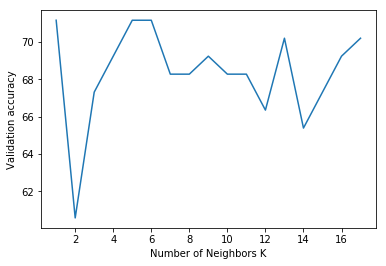

In [23]:
# Plot 
plt.plot(list_k, list_acc)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Validation accuracy")
plt.show()

In [24]:
# => So we choose k = 5 as best choice

In [25]:
# Model development
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_df, y_train)
yhat_train = knn.predict(X_train_df)

# Decision Tree

In [26]:
# Model development
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)
yhat_train = dtc.predict(X_train) 

In [27]:
!pip install graphviz

In [28]:
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import display, SVG

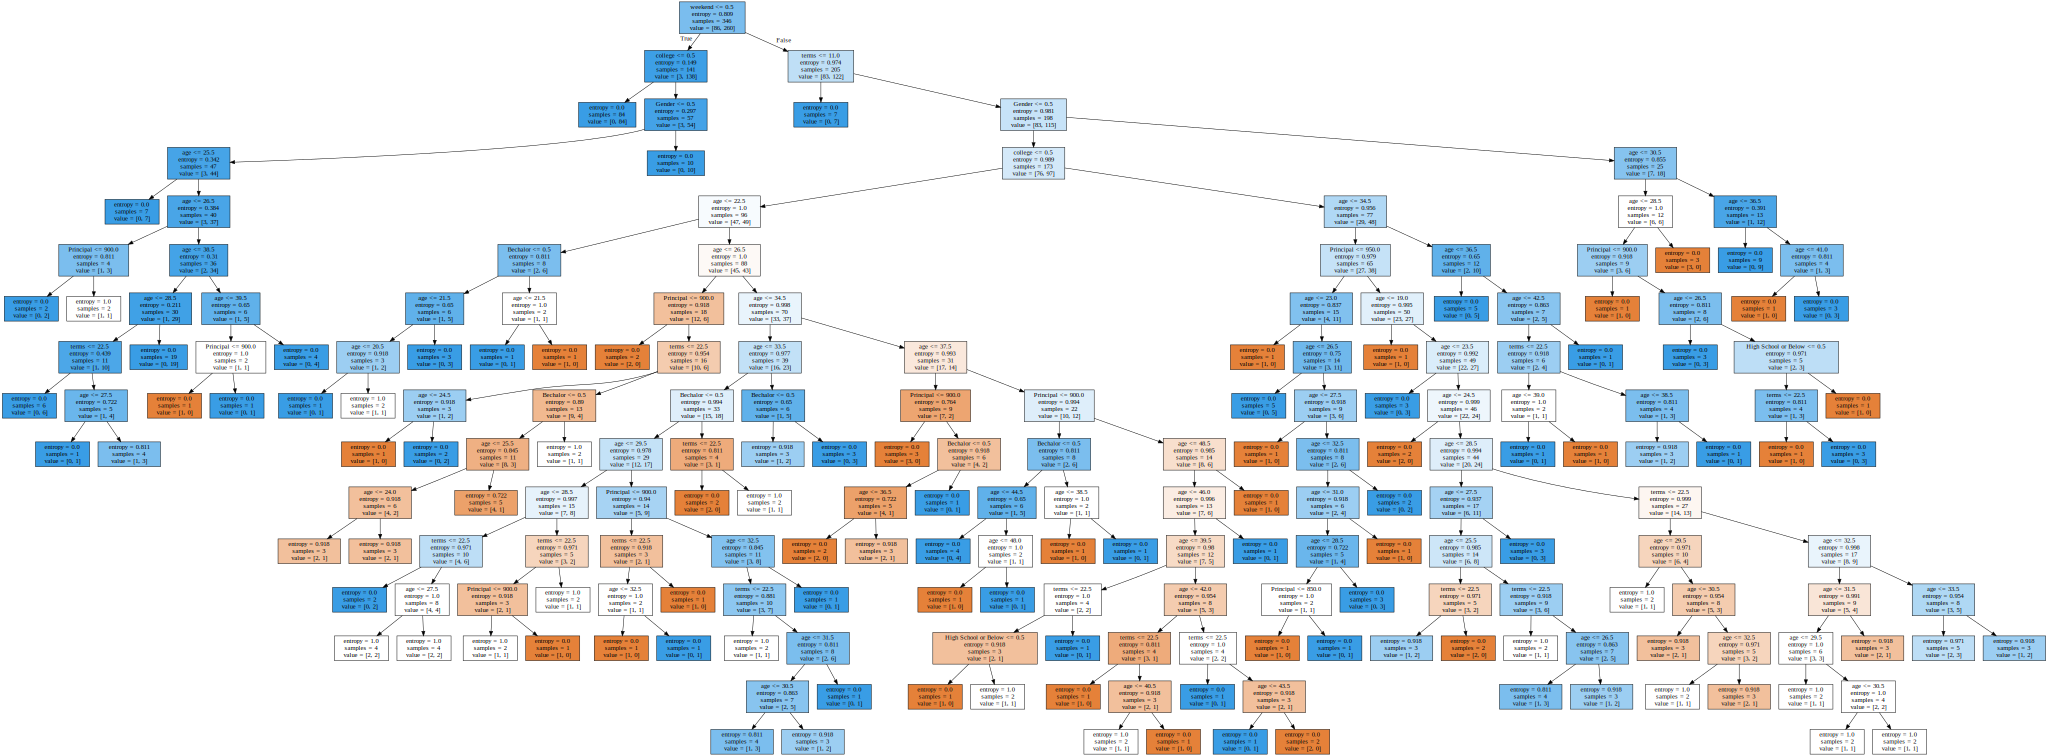

In [29]:
graph = Source(tree.export_graphviz(dtc, out_file=None, feature_names=X_train.columns, filled=True))
display(SVG(graph.pipe(format="svg")))

# Support Vector Machine

In [30]:
# Model Development
svc = SVC(C=100, gamma= 0.001, kernel ="rbf")
svc.fit(X_train_df, y_train)
yhat_train = svc.predict(X_train_df)

## Logistic Regression

In [31]:
# Model Development
lgr = LogisticRegression()
lgr.fit(X_train_df, y_train)
yhat_train = lgr.predict(X_train_df)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Model Evaluation using Test set

In [32]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [33]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-04-06 09:59:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-04-06 09:59:57 (299 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [34]:
test_df = pd.read_csv('loan_test.csv')
test_df = test_df.iloc[:,2:]
test_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


## Data Wrangling

In [35]:
# Convert date type
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
# Convert from categorical variable to numeric variable
test_df['Gender'] = test_df['Gender'].map({"male":0, "female":1})
# Feature extraction
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x:1 if (x > 3) else 0)
# Get dummy
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(["Master or Above"], axis=1, inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


## Feature Selection

In [36]:
X_val = test_Feature
y_val = test_df['loan_status'].map({"PAIDOFF":1, "COLLECTION":0})
X_val.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


## Data Normalize

In [37]:
# Standardize
X_val_standardize = standardize.transform(X_val)
X_val_df = pd.DataFrame(X_val_standardize, columns=col_lst).add_prefix("StandardScaler_")
X_val_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


,StandardScaler_Principal,StandardScaler_terms,StandardScaler_age,StandardScaler_Gender,StandardScaler_weekend,StandardScaler_Bechalor,StandardScaler_High School or Below,StandardScaler_college
0,0.515785,0.920718,3.160619,2.377782,-1.205778,2.619854,-0.879977,-0.869681
1,-5.890524,-1.961686,0.673339,-0.420560,0.829340,-0.381701,-0.879977,-0.869681
2,0.515785,0.920718,1.999888,2.377782,0.829340,-0.381701,1.136394,-0.869681
3,0.515785,0.920718,-0.819029,-0.420560,0.829340,-0.381701,-0.879977,1.149847
4,-1.314589,-0.959111,-0.321573,-0.420560,0.829340,2.619854,-0.879977,-0.869681


# MODEL EVALUATION

## KNN

In [38]:
# Make prediction
yhat_val = knn.predict(X_val_df)

In [39]:
# Model Evaluation
# Jaccard Score
print("The Jaccard Score on Train data: ", jaccard_similarity_score(y_train, yhat_train))
print("The Jaccard Score on Test data: ", jaccard_similarity_score(y_val, yhat_val))

The Jaccard Score on Train data:  0.7543352601156069
The Jaccard Score on Test data:  0.7222222222222222


In [40]:
# Confusion matrix
conf_mat = confusion_matrix(y_val, yhat_val)
print("Confusion matrix on Test data:\n", conf_mat)

Confusion matrix on Test data:
 [[ 4 10]
 [ 5 35]]


In [41]:
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.44      0.29      0.35        14
           1       0.78      0.88      0.82        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.61      0.58      0.59        54
weighted avg       0.69      0.72      0.70        54



In [42]:
print("F1 score on Test data: ",f1_score(y_val, yhat_val, average="macro"))

F1 score on Test data:  0.5856777493606138


# Decision Tree

In [43]:
# Make prediction
yhat_val = dtc.predict(X_val)

In [44]:
# Model Evaluation
# Jaccard Score
print("The Jaccard Score on Train data: ", jaccard_similarity_score(y_train, yhat_train))
print("The Jaccard Score on Test data: ", jaccard_similarity_score(y_val, yhat_val))

The Jaccard Score on Train data:  0.7543352601156069
The Jaccard Score on Test data:  0.6851851851851852


In [45]:
# Confusion matrix
conf_mat = confusion_matrix(y_val, yhat_val)
print("Confusion matrix on Test data:\n", conf_mat)

Confusion matrix on Test data:
 [[ 6  8]
 [ 9 31]]


In [46]:
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.40      0.43      0.41        14
           1       0.79      0.78      0.78        40

   micro avg       0.69      0.69      0.69        54
   macro avg       0.60      0.60      0.60        54
weighted avg       0.69      0.69      0.69        54



In [47]:
print("F1 score on Test data: ",f1_score(y_val, yhat_val, average="macro"))

F1 score on Test data:  0.5993016150152772


## SVC

In [48]:
# Make prediction
yhat_val = svc.predict(X_val_df)

In [49]:
# Model Evaluation
# Jaccard Score
print("The Jaccard Score on Train data: ", jaccard_similarity_score(y_train, yhat_train))
print("The Jaccard Score on Test data: ", jaccard_similarity_score(y_val, yhat_val))

The Jaccard Score on Train data:  0.7543352601156069
The Jaccard Score on Test data:  0.7407407407407407


In [50]:
# Confusion matrix
conf_mat = confusion_matrix(y_val, yhat_val)
print("Confusion matrix on Test data:\n", conf_mat)

Confusion matrix on Test data:
 [[ 0 14]
 [ 0 40]]


In [51]:
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
print("F1 score on Test data: ",f1_score(y_val, yhat_val, average="macro"))

F1 score on Test data:  0.425531914893617


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
# => cannot regconize class 0 and so overfitting

## Logistic Regression

In [54]:
# Make prediction
yhat_val = lgr.predict(X_val_df)

In [55]:
# Model Evaluation
# Jaccard Score
print("The Jaccard Score on Train data: ", jaccard_similarity_score(y_train, yhat_train))
print("The Jaccard Score on Test data: ", jaccard_similarity_score(y_val, yhat_val))

The Jaccard Score on Train data:  0.7543352601156069
The Jaccard Score on Test data:  0.7592592592592593


In [56]:
# Confusion matrix
conf_mat = confusion_matrix(y_val, yhat_val)
print("Confusion matrix on Test data:\n", conf_mat)

Confusion matrix on Test data:
 [[ 1 13]
 [ 0 40]]


In [57]:
print(classification_report(y_val, yhat_val))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.75      1.00      0.86        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54



In [87]:
print("F1 score on Test data: ",f1_score(y_val, yhat_val, average="macro"))

F1 score on Test data:  0.4967741935483871


In [58]:
# Log loss
# predict probability
probs = lgr.predict_proba(X_val_df)
# keep the prediction for class 1 only
probs = probs[:,1] 
print("Log loss on Test data: ", log_loss(y_val, probs))

Log loss on Test data:  0.47755447652422056


In [59]:
# => Recall class 0 is 0.07 => to low

# HANDLING IMBALANCE DATA

In [60]:
# Read train data again
df = pd.read_csv('loan_train.csv')
df = df.iloc[:,2:]
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [61]:
# Check proportion on target variable
df['loan_status'].value_counts(normalize=True)

PAIDOFF       0.751445
COLLECTION    0.248555
Name: loan_status, dtype: float64

In [62]:
df_po = df[df['loan_status']=='PAIDOFF']
df_clt = df[df['loan_status']=='COLLECTION']

In [63]:
df_po.shape

(260, 8)

In [64]:
df_clt.shape

(86, 8)

In [65]:
from sklearn.utils import resample

In [66]:
df_clt_resampled = resample(df_clt, replace=True, n_samples=df_po.shape[0], random_state=28)
df_clt_resampled.shape

(260, 8)

In [67]:
df_upsampled = pd.concat([df_clt_resampled, df_po])
df_upsampled.shape

(520, 8)

In [68]:
df_upsampled.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
261,COLLECTION,1000,30,9/9/2016,10/8/2016,37,High School or Below,male
265,COLLECTION,1000,30,9/10/2016,10/9/2016,40,High School or Below,male
282,COLLECTION,1000,15,9/11/2016,10/25/2016,31,college,male
292,COLLECTION,1000,30,9/11/2016,10/10/2016,25,college,male
263,COLLECTION,800,15,9/9/2016,9/23/2016,24,Bechalor,male


# Data Wrangling

In [69]:
# Convert date type
df_upsampled['due_date'] = pd.to_datetime(df_upsampled['due_date'])
df_upsampled['effective_date'] = pd.to_datetime(df_upsampled['effective_date'])
# Convert from categorical variable to numeric variable
df_upsampled['Gender'] = df_upsampled['Gender'].map({"male":0, "female":1})
# Feature extraction
df_upsampled['dayofweek'] = df_upsampled['effective_date'].dt.dayofweek
df_upsampled['weekend'] = df_upsampled['dayofweek'].apply(lambda x:1 if (x > 3) else 0)
# Get dummy
Feature = df_upsampled[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df_upsampled['education'])], axis=1)
Feature.drop(["Master or Above"], axis=1, inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
261,1000,30,37,0,1,0,1,0
265,1000,30,40,0,1,0,1,0
282,1000,15,31,0,1,0,0,1
292,1000,30,25,0,1,0,0,1
263,800,15,24,0,1,1,0,0


## Normalize Data

In [82]:
# Get column names
col_lst = Feature.columns.values.tolist()
# Apply StandardScaler
standardize= preprocessing.StandardScaler().fit(Feature)
Feature_standardize = standardize.transform(Feature)
Feature_df = pd.DataFrame(Feature_standardize, columns=col_lst).add_prefix("StandardScaler_")
Feature_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


,StandardScaler_Principal,StandardScaler_terms,StandardScaler_age,StandardScaler_Gender,StandardScaler_weekend,StandardScaler_Bechalor,StandardScaler_High School or Below,StandardScaler_college
0,0.511515,0.888961,1.069585,-0.367928,0.630753,-0.371289,1.096991,-0.849620
1,0.511515,0.888961,1.575667,-0.367928,0.630753,-0.371289,1.096991,-0.849620
2,0.511515,-1.033384,0.057421,-0.367928,0.630753,-0.371289,-0.911584,1.176997
3,0.511515,0.888961,-0.954743,-0.367928,0.630753,-0.371289,-0.911584,1.176997
4,-1.466089,-1.033384,-1.123437,-0.367928,0.630753,2.693319,-0.911584,-0.849620


## Feature Selection

In [83]:
X_train_df = Feature_df
y_train = df_upsampled["loan_status"].map({"PAIDOFF":1, "COLLECTION":0})
X_train_df.head()

,StandardScaler_Principal,StandardScaler_terms,StandardScaler_age,StandardScaler_Gender,StandardScaler_weekend,StandardScaler_Bechalor,StandardScaler_High School or Below,StandardScaler_college
0,0.511515,0.888961,1.069585,-0.367928,0.630753,-0.371289,1.096991,-0.849620
1,0.511515,0.888961,1.575667,-0.367928,0.630753,-0.371289,1.096991,-0.849620
2,0.511515,-1.033384,0.057421,-0.367928,0.630753,-0.371289,-0.911584,1.176997
3,0.511515,0.888961,-0.954743,-0.367928,0.630753,-0.371289,-0.911584,1.176997
4,-1.466089,-1.033384,-1.123437,-0.367928,0.630753,2.693319,-0.911584,-0.849620


In [84]:
y_train.head()

261    0
265    0
282    0
292    0
263    0
Name: loan_status, dtype: int64

In [85]:
y_train.shape

(520,)

In [87]:
X_train_df.shape

(520, 8)

# MODEL DEVELOPMENT

## KNN

In [88]:
# Train test split
x_train, x_test, y_train1, y_test = train_test_split(X_train_df, y_train, test_size=.3, random_state=42)

In [89]:
# Find best k
list_k = []
list_acc = []
for K_value in range(1, int(y_train.shape[0] ** 0.5)):
    list_k.append(K_value)
    knn = KNeighborsClassifier(n_neighbors=K_value)
    knn.fit(x_train, y_train1)
    yhat = knn.predict(x_test)
    acc = accuracy_score(y_test, yhat) * 100
    list_acc.append(acc)
    print("Accuracy is", acc, "% for K-Value:", K_value)
vi_tri = list_acc.index(max(list_acc))
k = list_k[vi_tri]
print("\nThe optimal number of neighbor is %d with %0.1f%%" %(k, list_acc[vi_tri]))

Accuracy is 75.64102564102564 % for K-Value: 1
Accuracy is 77.56410256410257 % for K-Value: 2
Accuracy is 78.2051282051282 % for K-Value: 3
Accuracy is 76.92307692307693 % for K-Value: 4
Accuracy is 76.92307692307693 % for K-Value: 5
Accuracy is 75.0 % for K-Value: 6
Accuracy is 73.71794871794873 % for K-Value: 7
Accuracy is 74.35897435897436 % for K-Value: 8
Accuracy is 79.48717948717949 % for K-Value: 9
Accuracy is 76.92307692307693 % for K-Value: 10
Accuracy is 77.56410256410257 % for K-Value: 11
Accuracy is 77.56410256410257 % for K-Value: 12
Accuracy is 78.2051282051282 % for K-Value: 13
Accuracy is 75.64102564102564 % for K-Value: 14
Accuracy is 76.92307692307693 % for K-Value: 15
Accuracy is 75.64102564102564 % for K-Value: 16
Accuracy is 76.28205128205127 % for K-Value: 17
Accuracy is 75.0 % for K-Value: 18
Accuracy is 74.35897435897436 % for K-Value: 19
Accuracy is 74.35897435897436 % for K-Value: 20
Accuracy is 75.0 % for K-Value: 21

The optimal number of neighbor is 9 with 

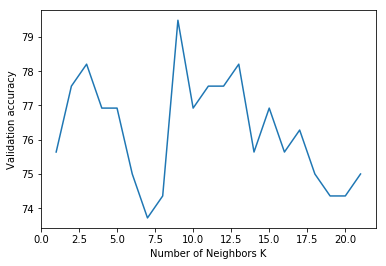

In [90]:
# Plot 
plt.plot(list_k, list_acc)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Validation accuracy")
plt.show()

In [92]:
# => So we choose k = 9 as best choice

In [105]:
# Model development
knn = KNeighborsClassifier(n_neighbors=)
knn.fit(X_train_df, y_train)
yhat_train = knn.predict(X_train_df)

## Decision Tree

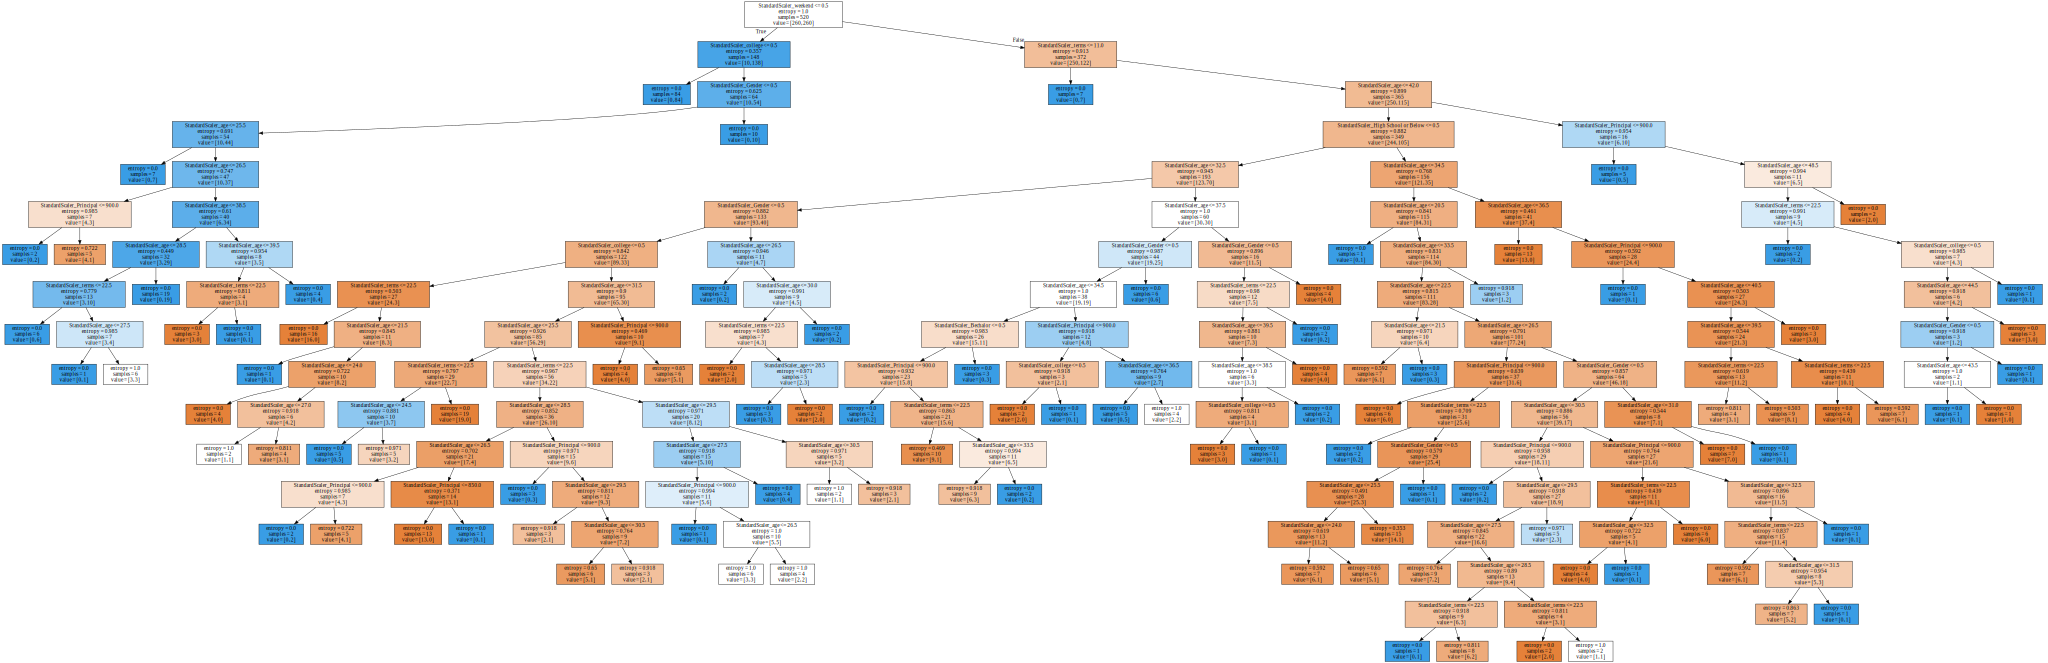

In [94]:
# Model development
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(Feature, y_train)
yhat_train = dtc.predict(Feature) 

!pip install graphviz

from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import display, SVG

graph = Source(tree.export_graphviz(dtc, out_file=None, feature_names=X_train.columns, filled=True))
display(SVG(graph.pipe(format="svg")))


## Support Vector Machine

In [95]:
# Model Development
svc = SVC(C=100, gamma= 0.001, kernel ="rbf")
svc.fit(X_train_df, y_train)
yhat_train = svc.predict(X_train_df)


## Logistic Regression

In [96]:
# Model Development
lgr = LogisticRegression()
lgr.fit(X_train_df, y_train)
yhat_train = lgr.predict(X_train_df)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# MODEL EVALUATION

## Normalize test data

In [98]:
# Standardize 
X_val_standardize = standardize.transform(X_val)
X_val_df = pd.DataFrame(X_val_standardize, columns=col_lst).add_prefix("StandardScaler_")
X_val_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


,StandardScaler_Principal,StandardScaler_terms,StandardScaler_age,StandardScaler_Gender,StandardScaler_weekend,StandardScaler_Bechalor,StandardScaler_High School or Below,StandardScaler_college
0,0.511515,0.888961,3.262607,2.717921,-1.585406,2.693319,-0.911584,-0.849620
1,-6.410101,-2.058634,0.732197,-0.367928,0.630753,-0.371289,-0.911584,-0.849620
2,0.511515,0.888961,2.081749,2.717921,0.630753,-0.371289,1.096991,-0.849620
3,0.511515,0.888961,-0.786049,-0.367928,0.630753,-0.371289,-0.911584,1.176997
4,-1.466089,-1.033384,-0.279967,-0.367928,0.630753,2.693319,-0.911584,-0.849620


## KNN

In [106]:
# Make prediction
yhat_val = knn.predict(X_val_df)
# Model Evaluation
# Jaccard Score
print("The Jaccard Score on Train data: ", jaccard_similarity_score(y_train, yhat_train))
print("The Jaccard Score on Test data: ", jaccard_similarity_score(y_val, yhat_val))
# Confusion matrix
conf_mat = confusion_matrix(y_val, yhat_val)
print("Confusion matrix on Test data:\n", conf_mat)

print(classification_report(y_val, yhat_val))

print("F1 score on Test data: ",f1_score(y_val, yhat_val, average="macro"))

The Jaccard Score on Train data:  0.8
The Jaccard Score on Test data:  0.6851851851851852
Confusion matrix on Test data:
 [[11  3]
 [14 26]]
              precision    recall  f1-score   support

           0       0.44      0.79      0.56        14
           1       0.90      0.65      0.75        40

   micro avg       0.69      0.69      0.69        54
   macro avg       0.67      0.72      0.66        54
weighted avg       0.78      0.69      0.70        54

F1 score on Test data:  0.6588628762541806


## Decision Tree

In [100]:
# Make prediction
yhat_val = dtc.predict(X_val)

# Model Evaluation
# Jaccard Score
print("The Jaccard Score on Train data: ", jaccard_similarity_score(y_train, yhat_train))
print("The Jaccard Score on Test data: ", jaccard_similarity_score(y_val, yhat_val))

# Confusion matrix
conf_mat = confusion_matrix(y_val, yhat_val)
print("Confusion matrix on Test data:\n", conf_mat)

print(classification_report(y_val, yhat_val))

print("F1 score on Test data: ",f1_score(y_val, yhat_val, average="macro"))

The Jaccard Score on Train data:  0.7615384615384615
The Jaccard Score on Test data:  0.6666666666666666
Confusion matrix on Test data:
 [[ 7  7]
 [11 29]]
              precision    recall  f1-score   support

           0       0.39      0.50      0.44        14
           1       0.81      0.72      0.76        40

   micro avg       0.67      0.67      0.67        54
   macro avg       0.60      0.61      0.60        54
weighted avg       0.70      0.67      0.68        54

F1 score on Test data:  0.6003289473684211


## SVC

In [101]:
# Make prediction
yhat_val = svc.predict(X_val_df)

# Model Evaluation
# Jaccard Score
print("The Jaccard Score on Train data: ", jaccard_similarity_score(y_train, yhat_train))
print("The Jaccard Score on Test data: ", jaccard_similarity_score(y_val, yhat_val))

# Confusion matrix
conf_mat = confusion_matrix(y_val, yhat_val)
print("Confusion matrix on Test data:\n", conf_mat)

print(classification_report(y_val, yhat_val))

print("F1 score on Test data: ",f1_score(y_val, yhat_val, average="macro"))

# => cannot regconize class 0 and so overfitting

The Jaccard Score on Train data:  0.7615384615384615
The Jaccard Score on Test data:  0.6296296296296297
Confusion matrix on Test data:
 [[10  4]
 [16 24]]
              precision    recall  f1-score   support

           0       0.38      0.71      0.50        14
           1       0.86      0.60      0.71        40

   micro avg       0.63      0.63      0.63        54
   macro avg       0.62      0.66      0.60        54
weighted avg       0.73      0.63      0.65        54

F1 score on Test data:  0.6029411764705882


## Logistic Regression

In [102]:
# Make prediction
yhat_val = lgr.predict(X_val_df)

# Model Evaluation
# Jaccard Score
print("The Jaccard Score on Train data: ", jaccard_similarity_score(y_train, yhat_train))
print("The Jaccard Score on Test data: ", jaccard_similarity_score(y_val, yhat_val))

# Confusion matrix
conf_mat = confusion_matrix(y_val, yhat_val)
print("Confusion matrix on Test data:\n", conf_mat)

print(classification_report(y_val, yhat_val))

print("F1 score on Test data: ",f1_score(y_val, yhat_val, average="macro"))

# Log loss
# predict probability
probs = lgr.predict_proba(X_val_df)
# keep the prediction for class 1 only
probs = probs[:,1] 
print("Log loss on Test data: ", log_loss(y_val, probs))

# => Recall class 0 is 0.07 => to low

The Jaccard Score on Train data:  0.7615384615384615
The Jaccard Score on Test data:  0.6481481481481481
Confusion matrix on Test data:
 [[11  3]
 [16 24]]
              precision    recall  f1-score   support

           0       0.41      0.79      0.54        14
           1       0.89      0.60      0.72        40

   micro avg       0.65      0.65      0.65        54
   macro avg       0.65      0.69      0.63        54
weighted avg       0.76      0.65      0.67        54

F1 score on Test data:  0.6265016381507098
Log loss on Test data:  0.5512933025777641


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.6851  | 0.6588   | NA      |
| Decision Tree      | 0.6666  | 0.6003   | NA      |
| SVM                | 0.6296  | 0.6029   | NA      |
| LogisticRegression | 0.6481  | 0.6265   | 0.5512  |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>